<a href="https://colab.research.google.com/github/ashu433/Titanic-Dataset-/blob/master/Titanic_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_set=pd.read_csv('titanic.csv')
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_set=data_set.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [ ]:
data_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data_set.shape

(891, 8)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
data_set.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data_set.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_1=pd.get_dummies(data_set.Sex)
df_2=pd.get_dummies(data_set.Embarked)
data_set=pd.concat([data_set,df_1,df_2],axis=1)
data_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1


In [ ]:
data_set=data_set.drop(['Sex','Embarked'],axis=1)

In [ ]:
data_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
print(data_set.isna().sum())

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
female        0
male          0
C             0
Q             0
S             0
dtype: int64


In [ ]:
data_set=data_set.interpolate()

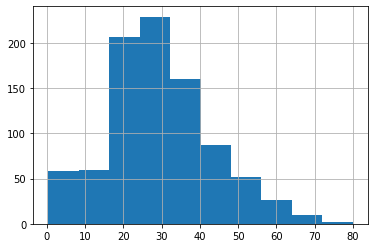

In [ ]:
data_set.Age.hist()

In [ ]:
print(data_set.isna().sum())

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
female      0
male        0
C           0
Q           0
S           0
dtype: int64


In [ ]:
y=data_set.Survived
data_set=data_set.drop(['Survived'],axis=1)

In [ ]:
X=data_set
print(X.head())
y.head()

   Pclass   Age  SibSp  Parch     Fare  female  male  C  Q  S
0       3  22.0      1      0   7.2500       0     1  0  0  1
1       1  38.0      1      0  71.2833       1     0  1  0  0
2       3  26.0      0      0   7.9250       1     0  0  0  1
3       1  35.0      1      0  53.1000       1     0  0  0  1
4       3  35.0      0      0   8.0500       0     1  0  0  1


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn import preprocessing
Standardisation = preprocessing.StandardScaler() 
X=Standardisation.fit_transform(X)
print(X)

[[ 0.82737724 -0.55604973  0.43279337 ... -0.48204268 -0.30756234
   0.61930636]
 [-1.56610693  0.59548094  0.43279337 ...  2.0745051  -0.30756234
  -1.61470971]
 [ 0.82737724 -0.26816707 -0.4745452  ... -0.48204268 -0.30756234
   0.61930636]
 ...
 [ 0.82737724 -0.5200644   0.43279337 ... -0.48204268 -0.30756234
   0.61930636]
 [-1.56610693 -0.26816707 -0.4745452  ...  2.0745051  -0.30756234
  -1.61470971]
 [ 0.82737724  0.16365693 -0.4745452  ... -0.48204268  3.25137334
  -1.61470971]]


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
clf=DecisionTreeClassifier(random_state=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7597765363128491


In [ ]:
cross_val_score(clf,X,y,cv=10,scoring='accuracy')

array([0.67777778, 0.74157303, 0.75280899, 0.78651685, 0.78651685,
       0.82022472, 0.79775281, 0.71910112, 0.80898876, 0.79775281])

In [ ]:
clf_1=AdaBoostClassifier(base_estimator=clf,n_estimators=1000,random_state=12)
clf_1.fit(X_train,y_train)
y_pred=clf_1.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.770949720670391


In [ ]:
cross_val_score(clf_1,X,y,cv=10,scoring='accuracy')

array([0.74444444, 0.76404494, 0.75280899, 0.79775281, 0.80898876,
       0.76404494, 0.7752809 , 0.75280899, 0.78651685, 0.86516854])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_3=LogisticRegression(random_state=130)
clf_3.fit(X_train,y_train)
print(accuracy_score(y_test,y_pred))

0.770949720670391


In [ ]:
cross_val_score(clf_3,X,y,cv=10,scoring='accuracy')

array([0.76666667, 0.79775281, 0.76404494, 0.82022472, 0.7752809 ,
       0.78651685, 0.7752809 , 0.78651685, 0.83146067, 0.83146067])

In [ ]:
clf_4=AdaBoostClassifier(base_estimator=clf_3,n_estimators=1000,random_state=12)
clf_4.fit(X_train,y_train)
y_pred=clf_4.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7988826815642458


In [ ]:
cross_val_score(clf_4,X,y,cv=10,scoring='accuracy')

array([0.77777778, 0.79775281, 0.76404494, 0.79775281, 0.78651685,
       0.76404494, 0.78651685, 0.78651685, 0.79775281, 0.83146067])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf_5=GradientBoostingClassifier(n_estimators=1000,random_state=12,learning_rate=0.001)
clf_5.fit(X_train,y_train)
y_predi_1=clf_5.predict(X_test)
print(accuracy_score(y_test,y_predi_1))

0.7877094972067039


In [ ]:
cross_val_score(clf_5,X,y,cv=10,scoring='accuracy')

array([0.81111111, 0.78651685, 0.76404494, 0.84269663, 0.86516854,
       0.80898876, 0.79775281, 0.7752809 , 0.85393258, 0.80898876])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_6=RandomForestClassifier(n_estimators=1000,random_state=1)
clf_6.fit(X_train,y_train)
y_pred=clf_6.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7821229050279329


In [ ]:
cross_val_score(clf_6,X,y,cv=10,scoring='accuracy')

array([0.76666667, 0.76404494, 0.75280899, 0.79775281, 0.86516854,
       0.82022472, 0.79775281, 0.7752809 , 0.83146067, 0.83146067])

In [ ]:
from xgboost import XGBClassifier 
clf_7=XGBClassifier(learning_rate=0.001,n_estimators=1000)
clf_7.fit(X_train,y_train)
y_pred=clf_7.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7877094972067039


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf_9=KNN(n_neighbors=7)
clf_9.fit(X_train,y_train)
y_pred=clf_9.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.776536312849162


In [ ]:
from sklearn.ensemble import VotingClassifier
classifiers = [('DecisionTreeClassifier', clf),('LogisticRegression', clf_3),('GradientBoostingClassifier', clf_5),('RandomForestClassifier', clf_6),('XGBClassifier', clf_7),('KNeighborsClassifier', clf_9)] 
vc=VotingClassifier(estimators=classifiers)
vc.fit(X_train,y_train)
y_pred=vc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7932960893854749


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[100   6]
 [ 31  42]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       106
           1       0.88      0.58      0.69        73

    accuracy                           0.79       179
   macro avg       0.82      0.76      0.77       179
weighted avg       0.81      0.79      0.78       179



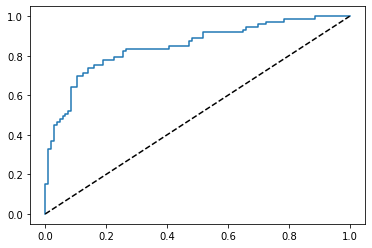

In [ ]:
from sklearn.metrics import roc_curve
probs=clf_3.predict_proba(X_test)
probs=probs[:,1]
fper,tper,threshold=roc_curve(y_test,probs)
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')